## 📊 Dataset Descriptions: U.S. Housing & Economic Indicators

1. **`CPIAUCSL.csv`**  
   📌 *Consumer Price Index (CPI) for All Urban Consumers*  
   - Monthly U.S. inflation data  
   - Measures the average price change for a basket of goods and services  
   - Source: Bureau of Labor Statistics (via FRED)

2. **`Metro_median_sale_price_uc_sfrcondo_week.csv`**  
   🏠 *Weekly Median Sale Prices by Metro (Condos & Single-Family Homes)*  
   - Granular, time-sensitive insights into real estate trends across U.S. metros  
   - Helpful for tracking local housing market dynamics

3. **`Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_month.csv`**  
   🏡 *Zillow Home Value Index (ZHVI) — Mid-Tier Properties*  
   - Monthly data from Zillow's ZHVI series  
   - Covers properties within the 33rd–67th percentile value range  
   - Useful for assessing price trends of median-market homes

4. **`MORTGAGE30US.csv`**  
   📉 *30-Year Fixed Mortgage Rates (U.S.)*  
   - Weekly interest rates on fixed-rate mortgages  
   - Influences housing affordability and buying behavior  
   - Source: Freddie Mac (via FRED)

5. **`RRVRUSQ156N.csv`**  
   🏘️ *U.S. Rental Vacancy Rate (Quarterly)*  
   - Tracks the percentage of rental housing units that are vacant  
   - Indicates housing supply-demand balance and rental market health  
   - Source: U.S. Census Bureau (via FRED)

---
📦 *These datasets collectively provide a strong foundation for analyzing U.S. housing market trends, affordability, inflation, and economic signals.*


In [1]:
import pandas as pd
import numpy as np

### Load all datasets

We deal with two types of datasets:
- national economic indicators (e.g., CPI, mortgage rates)
- housing market data  

In [2]:
national_economic_indicators = ['MORTGAGE30US.csv','RRVRUSQ156N.csv','CPIAUCSL.csv']

dfs = [pd.read_csv(f,parse_dates=True, index_col=0) for f in national_economic_indicators]
# mortage is weekly data
# cpi is monthly data
# vacancy is quaterly


In [3]:
fed_data = pd.concat(dfs, axis =1)
fed_data.tail()

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
2022-07-14,5.51,NaN,NaN
2022-07-21,5.54,NaN,NaN
2022-07-28,5.30,NaN,NaN
2022-08-04,4.99,NaN,NaN
2022-08-11,5.22,NaN,NaN


Since these CSV files contain data recorded at different time intervals — weekly in the mortgage dataset, monthly in the CPI dataset, and quarterly in the rental vacancy dataset — we need to align them to a common frequency for consistent analysis. To handle the missing values that result from this alignment, we use forward fill, which fills in missing data points with the last known value. In pandas, this can be achieved using the .ffill() method.

In [4]:
fed_data = fed_data.ffill()

In [5]:
fed_data.tail() # now all data are weekly 

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
2022-07-14,5.51,5.6,295.271
2022-07-21,5.54,5.6,295.271
2022-07-28,5.30,5.6,295.271
2022-08-04,4.99,5.6,295.271
2022-08-11,5.22,5.6,295.271


In [6]:
house_data = ['Metro_median_sale_price_uc_sfrcondo_week.csv','Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_month.csv']

dfs = [pd.read_csv(f) for f in house_data]
dfs[0].head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2008-02-02,2008-02-09,2008-02-16,2008-02-23,2008-03-01,...,2022-05-07,2022-05-14,2022-05-21,2022-05-28,2022-06-04,2022-06-11,2022-06-18,2022-06-25,2022-07-02,2022-07-09
0,102001,0,United States,Country,NaN,190000.0,190000.0,193000.0,189900.0,194900.0,...,369900.0,370000.0,370000.0,375000.0,375000.0,370000.0,375000.0,370000.0,370000.0,362500.0
1,394913,1,"New York, NY",Msa,NY,400000.0,418250.0,420000.0,420000.0,400000.0,...,550000.0,555000.0,550000.0,575000.0,575000.0,578000.0,590000.0,582000.0,585000.0,595000.0
2,753899,2,"Los Angeles-Long Beach-Anaheim, CA",Msa,CA,497500.0,515000.0,520000.0,525000.0,498250.0,...,914000.0,925000.0,925000.0,951000.0,950000.0,920500.0,925000.0,900000.0,900500.0,906000.0
3,394463,3,"Chicago, IL",Msa,IL,245000.0,245000.0,251000.0,255000.0,255000.0,...,315000.0,310000.0,315500.0,315000.0,330000.0,324950.0,335000.0,325000.0,325000.0,315000.0
4,394514,4,"Dallas-Fort Worth, TX",Msa,TX,144250.0,148900.0,139000.0,143700.0,145900.0,...,422000.0,430000.0,430000.0,425000.0,440000.0,425000.0,427750.0,426000.0,420000.0,420000.0


In housing dataset each row represents a different metro area, and the columns represent the median sale price for that area. For a prediction task we can only take one particular metro area i.e. one particular row.  


In [7]:
dfs = [pd.DataFrame(df.iloc[0,5:]) for df in dfs ] # only taking first row 
dfs[0].head()

,0
2008-02-02,190000.0
2008-02-09,190000.0
2008-02-16,193000.0
2008-02-23,189900.0
2008-03-01,194900.0


we can observe that in housing data the data is recorded monthly, while our previous economic indicators are recorded weekly

In [8]:
for df in dfs:
    df.index = pd.to_datetime(df.index)
    df['month'] = df.index.to_period('M')

In [9]:
dfs[1]

,0,month
1996-01-31,108641.264685,1996-01
1996-02-29,108472.72888,1996-02
1996-03-31,108532.280074,1996-03
1996-04-30,108739.077466,1996-04
1996-05-31,108986.621607,1996-05
...,...,...
2022-03-31,344042.433111,2022-03
2022-04-30,350515.841789,2022-04
2022-05-31,354717.722904,2022-05
2022-06-30,357473.327397,2022-06


In [10]:
housing_price = dfs[0].merge(dfs[1], on= 'month')

In [11]:
housing_price.index =  dfs[0].index

In [12]:
del housing_price['month']
columns = ['price','value']
housing_price.columns = columns


price mean the actual amount the customer paid, value means the estimated value of the property.

In [13]:
housing_price

,price,value
2008-02-02,190000.0,206885.853266
2008-02-09,190000.0,206885.853266
2008-02-16,193000.0,206885.853266
2008-02-23,189900.0,206885.853266
2008-03-01,194900.0,205459.521952
...,...,...
2022-06-11,370000.0,357473.327397
2022-06-18,375000.0,357473.327397
2022-06-25,370000.0,357473.327397
2022-07-02,370000.0,357107.271636


Now we need to combine the natinal economic indicators with the housing data. 

In [14]:
housing_price.loc['2022-05-02': '2022-06-01']

,price,value
2022-05-07,369900.0,354717.722904
2022-05-14,370000.0,354717.722904
2022-05-21,370000.0,354717.722904
2022-05-28,375000.0,354717.722904


In [15]:
fed_data.loc['2022-05-2':'2022-06-01']

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
2022-05-05,5.27,5.6,291.474
2022-05-12,5.30,5.6,291.474
2022-05-19,5.25,5.6,291.474
2022-05-26,5.10,5.6,291.474
2022-06-01,5.10,5.6,295.328


Before Combining these, we can obseve that the nation econmic indicators and those house price data are off by 2 days. So we need to shift the national economic indicators by 2 days.

In [16]:
from datetime import timedelta 

fed_data.index = fed_data.index + timedelta(days=2) 

In [17]:
fed_data.loc['2022-05-2':'2022-06-01']

,MORTGAGE30US,RRVRUSQ156N,CPIAUCSL
DATE,,,
2022-05-03,5.10,5.6,291.474
2022-05-07,5.27,5.6,291.474
2022-05-14,5.30,5.6,291.474
2022-05-21,5.25,5.6,291.474
2022-05-28,5.10,5.6,291.474


In [18]:
housing_price.loc['2022-05-2':'2022-06-01']

,price,value
2022-05-07,369900.0,354717.722904
2022-05-14,370000.0,354717.722904
2022-05-21,370000.0,354717.722904
2022-05-28,375000.0,354717.722904


Now everything looks aligned. We can combine the national economic indicators with the housing data.

In [19]:
price_data =  fed_data.merge(housing_price, left_index=True, right_index=True)

In [20]:
price_data.columns = ['interest','vacancy','cpi','price','value']

In [21]:
price_data

,interest,vacancy,cpi,price,value
2008-02-02,5.68,10.1,212.174,190000.0,206885.853266
2008-02-09,5.67,10.1,212.687,190000.0,206885.853266
2008-02-16,5.72,10.1,212.687,193000.0,206885.853266
2008-02-23,6.04,10.1,212.687,189900.0,206885.853266
2008-03-01,6.24,10.1,212.687,194900.0,205459.521952
...,...,...,...,...,...
2022-06-11,5.23,5.6,295.328,370000.0,357473.327397
2022-06-18,5.78,5.6,295.328,375000.0,357473.327397
2022-06-25,5.81,5.6,295.328,370000.0,357473.327397
2022-07-02,5.70,5.6,295.328,370000.0,357107.271636


### Data Exploration

In [36]:
print('1. Shape of Our dataframe is: ' ,price_data.shape)
print('\n2. DataTypes : ')
print( price_data.dtypes)
print('\n3. Stats ')
print(price_data.describe())
print('\n4. Are there any NaN or missing values: ', price_data.isna().sum().any())

1. Shape of Our dataframe is:  (735, 5)

2. DataTypes : 
interest    float64
vacancy     float64
cpi         float64
price        object
value        object
dtype: object

3. Stats 
         interest     vacancy         cpi
count  735.000000  735.000000  735.000000
mean     4.156762    7.912517  239.865895
std      0.803161    1.555366   18.805475
min      2.650000    5.600000  211.398000
25%      3.620000    6.800000  226.597000
50%      4.040000    7.300000  237.460000
75%      4.580000    9.400000  252.551000
max      6.630000   11.100000  295.328000

4. Are there any NaN or missing values:  False


Visualizing the data: 

In [37]:
import matplotlib.pyplot as plt 

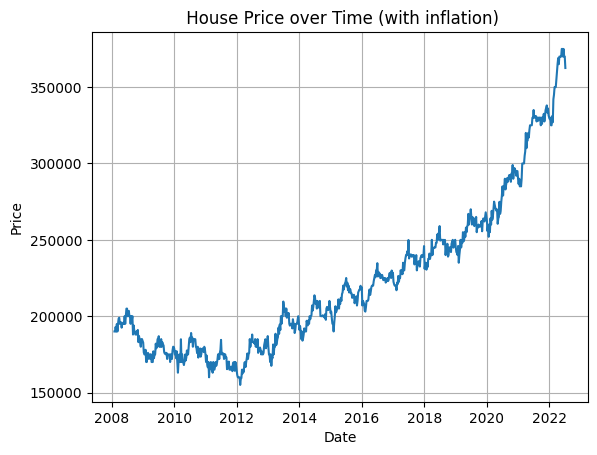

In [40]:
plt.plot(price_data.index, price_data['price'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(' House Price over Time (with inflation)')
plt.grid(True)
plt.show()

For prediction we don't want to deal with the inflation. So we need to calculated the adjusted price without inflation.

In [ ]:
price_data['adj_price'] = price_data['price'] / price_data['cpi'] * 100
price_data['adj_value'] = price_data['value'] / price_data['cpi'] * 100

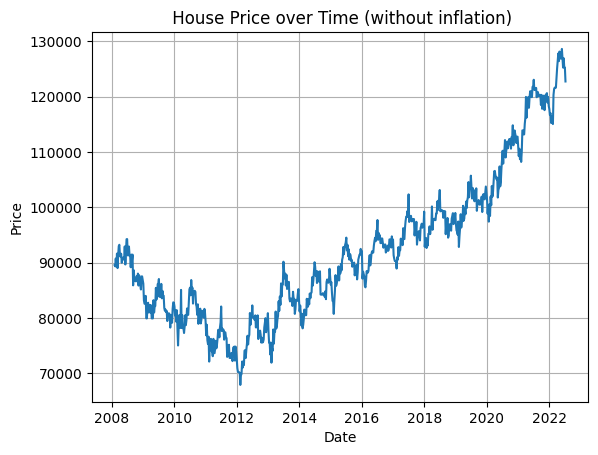

In [42]:
plt.plot(price_data.index, price_data['adj_price'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.title(' House Price over Time (without inflation)')
plt.grid(True)
plt.show()

Data Preprocessing:

In [45]:
# Target 
price_data['next_quater'] = price_data['adj_price'].shift(-13)

In [47]:
price_data.dropna(inplace=True)

In [ ]:
price_data['change'] = (price_data['next_quater'] > price_data['adj_price']).astype(int)
#The final target column

In [ ]:
price_data['change'].value_counts() # to check data balance

change
1    379
0    343
Name: count, dtype: int64

In [75]:
price_data

,interest,vacancy,cpi,price,value,adj_price,adj_value,next_quater,change
2008-02-02,5.68,10.1,212.174,190000.0,206885.853266,89549.143627,97507.636782,90610.014498,1
2008-02-09,5.67,10.1,212.687,190000.0,206885.853266,89333.151533,97272.448841,90563.547824,1
2008-02-16,5.72,10.1,212.687,193000.0,206885.853266,90743.674978,97272.448841,91014.739229,1
2008-02-23,6.04,10.1,212.687,189900.0,206885.853266,89286.134084,97272.448841,90610.014498,1
2008-03-01,6.24,10.1,212.687,194900.0,205459.521952,91637.006493,96601.824254,92933.348203,1
...,...,...,...,...,...,...,...,...,...
2022-03-12,3.85,5.8,287.708,350000.0,344042.433111,121651.118495,119580.419422,125284.429516,1
2022-03-19,4.16,5.8,287.708,350000.0,344042.433111,121651.118495,119580.419422,126977.462347,1
2022-03-26,4.42,5.8,287.708,355000.0,344042.433111,123388.991617,119580.419422,125284.429516,1
2022-04-02,4.67,5.8,287.708,360000.0,350515.841789,125126.864738,121830.412011,125284.429516,1


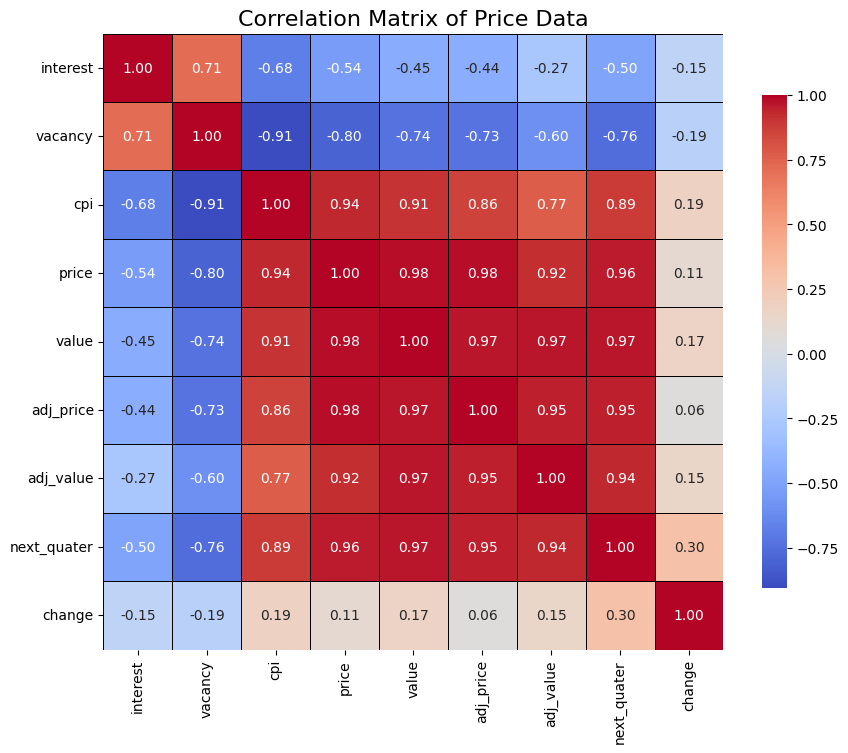

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate correlation matrix
corr = price_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, 
            annot=True,      
            fmt=".2f",        
            cmap="coolwarm",  
            linewidths=0.5,  
            linecolor='black',   
            cbar_kws={"shrink": 0.8})  
plt.title('Correlation Matrix of Price Data', fontsize=16)
plt.show()


In [54]:
predictors = ['interest','vacancy','adj_price','adj_value']
target  = 'change'

### Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn .metrics import accuracy_score 

In [162]:

for row in predictors:
    price_data[row] = price_data[row].apply(lambda x: float(x))

In [163]:
price_data.dtypes

interest          float64
vacancy           float64
cpi               float64
price              object
value              object
adj_price         float64
adj_value         float64
next_quater        object
change              int64
interest_year     float64
vacancy_year      float64
adj_price_year     object
adj_value_year     object
dtype: object

In [171]:
def predict(train,test,predictors,target):
    rf = RandomForestClassifier(
    n_estimators=250,           # More trees (default=100), more stability
    max_depth=10,               # Limit depth to prevent overfitting
    min_samples_split=5,        # Split node if >=5 samples
    min_samples_leaf=3,         # Leaf nodes must have at least 3 samples
    max_features='sqrt',        # Use sqrt(n_features) at each split (good for classification)
    bootstrap=True,             # Use bootstrap sampling
    random_state=42,            # Seed for reproducibility
    n_jobs=-1                   # Use all CPU cores (faster training)
                              )
   
    rf.fit(train[predictors],train[target])
    preds = rf.predict(test[predictors])
    return preds   

Be careful while creating train and test spilt in case of time series data. We need to make sure that the test set is always after the training set. 

In [172]:
START = 260
STEP  = 52
def backtest(data, predictors,target):
    all_preds=[]
    for i in range(START, data.shape[0],STEP):
        train =  price_data.iloc[:i]
        test  =  price_data.iloc[i:(i+STEP)]
        all_preds.append(predict(train,test,predictors,target))
        
    preds = np.concatenate(all_preds)
    return preds, accuracy_score(data.iloc[START:][target],preds)
        

In [174]:
preds, accuracy = backtest(price_data, predictors, target)
accuracy


0.6168831168831169

In [83]:
yearly = price_data.rolling(52, min_periods=1).mean()

In [104]:
yearly_ratios = [p + '_year' for p in predictors]
price_data[yearly_ratios] = price_data[predictors]/yearly[predictors]

In [145]:
preds,accuracy = backtest(price_data, predictors + yearly_ratios, target)
accuracy

0.6645021645021645

### output visualization 


In [111]:
pred_match = (preds == price_data[target].iloc[START:])

In [112]:
pred_match[ pred_match== True ] = 'green'
pred_match[ pred_match== False] = 'red'

C:\Users\sachi\AppData\Local\Temp\ipykernel_26760\1288418236.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'green' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  pred_match[ pred_match== True ] = 'green'


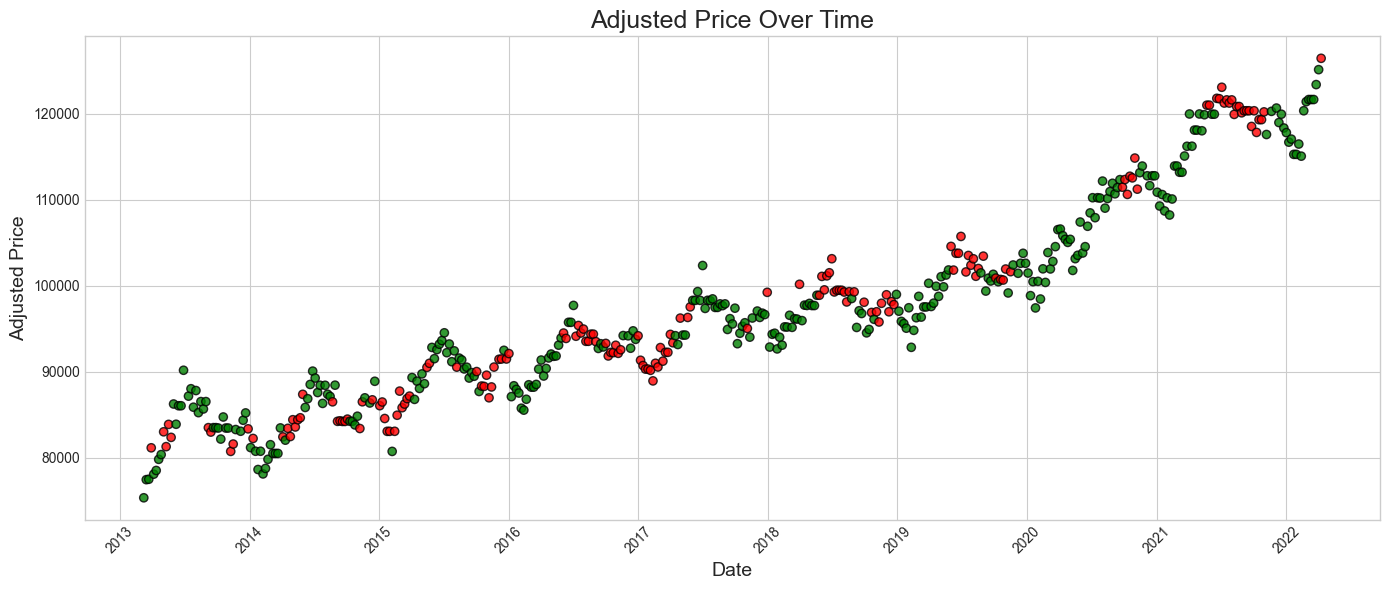

In [122]:
# Prepare the data
plot_data = price_data.iloc[START:].copy()
plot_data = plot_data.reset_index()


plt.figure(figsize=(14,6))
plt.style.use('seaborn-v0_8-whitegrid')
plt.scatter(
    x=plot_data['index'],
    y=plot_data['adj_price'],
    c=pred_match,   # color each point by prediction match
    edgecolor='k', 
    alpha=0.8        
)


plt.title('Adjusted Price Over Time', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Adjusted Price', fontsize=14)

plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [123]:
# finding feature importance
from sklearn.inspection import permutation_importance 

rf =  RandomForestClassifier(min_samples_split=10, random_state=43)
rf.fit(price_data[predictors], price_data[target])

result = permutation_importance(rf, price_data[predictors], price_data[target], n_repeats = 10, random_state =43)

In [124]:
result['importances_mean']

array([0.17936288, 0.17562327, 0.27880886, 0.31177285])